# Random walk

A random walk is different from a list of random numbers because the next value in the sequence is a modification of the previous value in the sequence

y(t) = B0 + B1*X(t-1) +e(t)

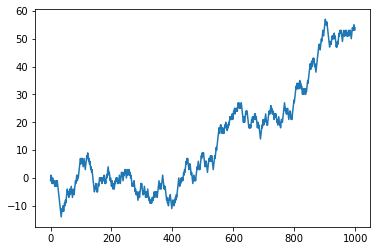

In [7]:
from random import seed
from random import random
from matplotlib import pyplot as plt
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
	movement = -1 if random() < 0.5 else 1
	value = random_walk[i-1] + movement
	random_walk.append(value)
pyplot.plot(random_walk)
pyplot.show()

THe shape and movement looks like a realistic time series

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

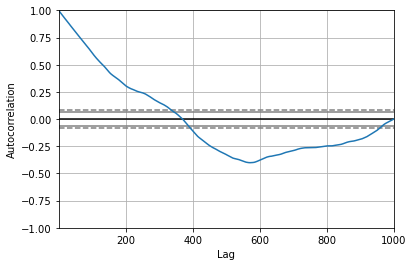

In [8]:
## Random Walk and Autocorrelation
import pandas as pd
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(random_walk)

The correlation is hifh in the first few hundreds lag observations

## Random Walk and Stationary

All random walk are non-stationary

In [9]:
# statistical test (adfuller test):
from statsmodels.tsa.stattools import adfuller
result = adfuller(random_walk)

print('ADF statistic: ', result[0])
print('p-value: ', result[1])
print('Critical values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF statistic:  0.3416045493539989
p-value:  0.9791747967918744
Critical values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


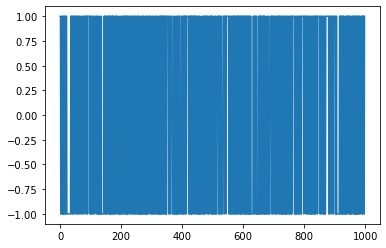

In [10]:
# try the lag feature of a random walk:
diff = list()
for i in range(1, len(random_walk)):
    value = random_walk[i] - random_walk[i-1]
    diff.append(value)

plt.plot(diff)
plt.show()

Running the example produces a line plot showing 1,000 movements of -1 and 1, a real mess.

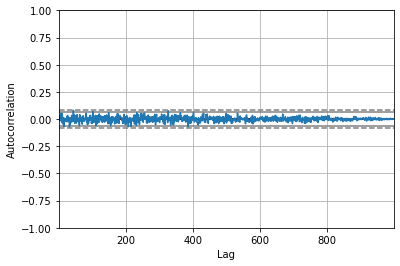

In [11]:
# autocorrelation plot
autocorrelation_plot(diff)
plt.show()

All correlations are small

## Predicting a Random Walk
A random walk is unpredictable
The best way to predict it is to use a Persistence model